In [35]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from white_demura import RGB_mask, sum_contour, read_and_extract_roi, apply_mask, get_signal_mapping, generate_mapping, extract_middle_roi


In [66]:
def RGB_mask_no_roi(image_path, output_path, threshold_val):
    """
    Preprocess an image by cropping and thresholding.

    Args:
        image_path (str): Path to the input grayscale image.
        threshold_val (int, optional): Threshold value for image thresholding.

    Returns:
        tuple: Tuple containing threshold value and path to the preprocessed image.
    """

    df = pd.DataFrame(columns=['id', 'x', 'y', 'area', 'perimeter', 'total_signal'])

    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

 
    # Filter out pixels with intensities below the threshold_val
    _, image_filtered = cv2.threshold(image, threshold_val, 255, cv2.THRESH_TOZERO)


    binary_image = np.where(image_filtered > 0,255,0)
    cv2.imwrite("binary.jpg", binary_image)


    print("Threshold value:", threshold_val)

    # Save and download to local disk
    # Extract the filename from the original image path
    filename = image_path.split("/")[-1]

    # Create the new path by concatenating the desired directory and the filename
    new_path = os.path.dirname(image_path) + "/thresholded/"

    # Create the folder if it doesn't exist
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    contours, _ = cv2.findContours(image_filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
   # cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = []
    # Create a copy of the original image
    image_with_rectangles = np.copy(image_filtered)

    
    threshold_area = 100

    id = 0
    for i in range(0, len(contours)):
        contour = contours[i]
    #for contour in contours:
        area = cv2.contourArea(contour)    
             
        if area > threshold_area:  
            filtered_contours.append(contour)
            x, y, w, h = cv2.boundingRect(contour)
            #cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (155), 1)  # Adjust color and thickness as needed
            cv2.drawContours(image_with_rectangles, [contour], -1, 100, 1)

            M = cv2.moments(contour)
            area = M["m00"]
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Perimeter
            perimeter = cv2.arcLength(contour, True)
            centroid = [cX, cY]
            cv2.circle(image_with_rectangles, (cX, cY), 0, (0), -1)
            cv2.putText(image_with_rectangles, str(id), (cX - 2, cY - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
            

            signal = sum_contour(contour, image)
            df.loc[len(df.index)] = [id, cX, cY, area, perimeter, signal]
            print("ID :", id)
            id = id + 1
                
    #Check the images with bounding rectangles
    cv2.imwrite(output_path, image_with_rectangles)
    
    new_path += filename

    cv2.imwrite(new_path, image_filtered)

    print("Saved thresholded image to: {}".format(new_path))

    return threshold_val, new_path, filtered_contours, df, binary_image

In [19]:
# width_ratio = 2, 4 

def scale_image(image, width_ratio, height_ratio):
    width = image.shape[1]
    height = image.shape[0]
    resized_image = cv2.resize(image, (int(width // width_ratio), int(height // height_ratio)))
    return resized_image


In [2]:
blue_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Z_300000000.bmp', -2100, -200)
blue_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Z_110000000.bmp', -2100, -200)
blue_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Z_21000000.bmp', -2100, -200)
blue_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Z_6500000.bmp', -2100, -200)
blue_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Z_1100000.bmp', -2100, -200)
blue_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Z_200000.bmp', -2100, -200)
blue_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Z_40000.bmp', -2100, -200)

In [7]:
green_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Y_200000000.bmp', -2100, -200)
green_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Y_40000000.bmp', -2100, -200)
green_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Y_12500000.bmp', -2100, -200)
green_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Y_3000000.bmp', -2100, -200)
green_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Y_650000.bmp', -2100, -200)
green_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Y_130000.bmp', -2100, -200)
green_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Y_25000.bmp', -2100, -200)

In [8]:
red_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_X_200000000.bmp', -2100, -200)
red_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_X_70000000.bmp', -2100, -200)
red_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_X_16000000.bmp', -2100, -200)
red_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_X_5000000.bmp', -2100, -200)
red_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_X_850000.bmp', -2100, -200)
red_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_X_180000.bmp', -2100, -200)
red_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_X_30000.bmp', -2100, -200)

In [3]:
clear_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_clear_200000000.bmp', -2100, -200)
clear_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_clear_70000000.bmp', -2100, -200)
clear_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_clear_16000000.bmp', -2100, -200)
clear_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_clear_4000000.bmp', -2100, -200)
clear_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_clear_700000.bmp', -2100, -200)
clear_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_clear_180000.bmp', -2100, -200)
clear_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_clear_30000.bmp', -2100, -200)

In [48]:
contours, _ = cv2.findContours(green_image_255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [49]:
len(contours)

1

In [9]:
red_image_4_4x4 = scale_image(red_image_4, 4, 4)
red_image_8_4x4 = scale_image(red_image_8, 4, 4)
red_image_16_4x4 = scale_image(red_image_16, 4, 4)
red_image_32_4x4 = scale_image(red_image_32, 4, 4)
red_image_64_4x4 = scale_image(red_image_64, 4, 4)
red_image_128_4x4 = scale_image(red_image_128, 4, 4)
red_image_255_4x4 = scale_image(red_image_255, 4, 4)

In [10]:
blue_image_4_4x4 = scale_image(blue_image_4, 4, 4)
blue_image_8_4x4 = scale_image(blue_image_8, 4, 4)
blue_image_16_4x4 = scale_image(blue_image_16, 4, 4)
blue_image_32_4x4 = scale_image(blue_image_32, 4, 4)
blue_image_64_4x4 = scale_image(blue_image_64, 4, 4)
blue_image_128_4x4 = scale_image(blue_image_128, 4, 4)
blue_image_255_4x4 = scale_image(blue_image_255, 4, 4)

In [11]:
green_image_4_4x4 = scale_image(green_image_4, 4, 4)
green_image_8_4x4 = scale_image(green_image_8, 4, 4)
green_image_16_4x4 = scale_image(green_image_16, 4, 4)
green_image_32_4x4 = scale_image(green_image_32, 4, 4)
green_image_64_4x4 = scale_image(green_image_64, 4, 4)
green_image_128_4x4 = scale_image(green_image_128, 4, 4)
green_image_255_4x4 = scale_image(green_image_255, 4, 4)

In [12]:
clear_image_4_4x4 = scale_image(clear_image_4, 4, 4)
clear_image_8_4x4 = scale_image(clear_image_8, 4, 4)
clear_image_16_4x4 = scale_image(clear_image_16, 4, 4)
clear_image_32_4x4 = scale_image(clear_image_32, 4, 4)
clear_image_64_4x4 = scale_image(clear_image_64, 4, 4)
clear_image_128_4x4 = scale_image(clear_image_128, 4, 4)
clear_image_255_4x4 = scale_image(clear_image_255, 4, 4)

In [14]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_4_4x4.jpg', blue_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_8_4x4.jpg', blue_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_16_4x4.jpg', blue_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_32_4x4.jpg', blue_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_64_4x4.jpg', blue_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_128_4x4.jpg', blue_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_255_4x4.jpg', blue_image_255_4x4)



True

In [15]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_4_4x4.jpg', red_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_8_4x4.jpg', red_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_16_4x4.jpg', red_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_32_4x4.jpg', red_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_64_4x4.jpg', red_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_128_4x4.jpg', red_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_255_4x4.jpg', red_image_255_4x4)



True

In [16]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_4_4x4.jpg', green_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_8_4x4.jpg', green_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_16_4x4.jpg', green_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_32_4x4.jpg', green_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_64_4x4.jpg', green_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_128_4x4.jpg', green_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_255_4x4.jpg', green_image_255_4x4)

True

In [17]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_4_4x4.jpg', clear_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_8_4x4.jpg', clear_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_16_4x4.jpg', clear_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_32_4x4.jpg', clear_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_64_4x4.jpg', clear_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_128_4x4.jpg', clear_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_255_4x4.jpg', clear_image_255_4x4)


True

In [53]:
clear_image_4_4x4

array([[ 12,  20,  25, ...,   9,  37, 103],
       [ 10,  18,  22, ...,  11, 169, 255],
       [ 15, 232, 255, ...,  10,  34, 116],
       ...,
       [ 20,  13, 118, ...,  96,  20,   9],
       [ 75,  19,  14, ...,  28,  18,   8],
       [120,  29,  12, ...,  16,  11,   8]], dtype=uint8)

In [77]:
a, b, contours, df, binary = RGB_mask_no_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_255_4x4.jpg','/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/contour_4x4.jpg', 10)

Threshold value: 10
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/thresholded/blue_image_255_4x4.jpg


In [64]:
a, b, contours, df, binary = RGB_mask_no_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_255_4x4.jpg','/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/contour_4x4.jpg', 10)

Threshold value: 10
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/thresholded/blue_image_255_4x4.jpg


In [68]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/binary4x4.jpg', binary)

True

In [89]:

def check(i, j, n, m):
    return i >= 0 and j >= 0 and i < n and j < m
 
def mark_component(v, vis, i, j, n, m, l):
    if not check(i, j, n, m):
        return
    
    vis[i][j] = True
    if v[i][j] == 255:
        v[i][j] = 0
        #add point to list
        l.append([i, j])

        #marking(connecting all possible part of single island.
        mark_component(v, vis, i + 1, j, n, m, l)
        mark_component(v, vis, i - 1, j, n, m, l)
        mark_component(v, vis, i, j + 1, n, m, l)
        mark_component(v, vis, i, j - 1, n, m, l)

 
v = binary.copy()
n = len(v)
m = len(v[0])
cnt = 0
vis = [[False for j in range(m)] for i in range(n)]
mapping = {}
idx = 0
for i in range(n):
    for j in range(m):
        if not vis[i][j] and v[i][j] == 255:
            cnt += 1
            lst = []
            mark_component(v, vis, i, j, n, m, lst)
            if len(lst) > 8:
                mapping[idx] = lst
                idx = idx + 1

print("The number of islands in the matrix are:")
print(len(mapping))

The number of islands in the matrix are:
1439


In [90]:
mask_image = np.zeros(binary.shape)

In [91]:
for item in mapping:
    for dot in mapping[item]:
        mask_image[dot[0]][dot[1]] = 255

In [92]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/mask_image.jpg', mask_image)

True

In [94]:
covered_pixels_mapping = mapping

In [95]:
signal_map_4 = get_signal_mapping(clear_image_4_4x4, covered_pixels_mapping)
signal_map_8 = get_signal_mapping(clear_image_8_4x4, covered_pixels_mapping)
signal_map_16 = get_signal_mapping(clear_image_16_4x4, covered_pixels_mapping)
signal_map_32 = get_signal_mapping(clear_image_32_4x4, covered_pixels_mapping)
signal_map_64 = get_signal_mapping(clear_image_64_4x4, covered_pixels_mapping)
signal_map_128 = get_signal_mapping(clear_image_128_4x4, covered_pixels_mapping)
signal_map_255 = get_signal_mapping(clear_image_255_4x4, covered_pixels_mapping)

In [97]:
signal_map_ground_truth_4 = get_signal_mapping(blue_image_4_4x4, covered_pixels_mapping)
signal_map_ground_truth_8 = get_signal_mapping(blue_image_8_4x4, covered_pixels_mapping)
signal_map_ground_truth_16 = get_signal_mapping(blue_image_16_4x4, covered_pixels_mapping)
signal_map_ground_truth_32 = get_signal_mapping(blue_image_32_4x4, covered_pixels_mapping)
signal_map_ground_truth_64 = get_signal_mapping(blue_image_64_4x4, covered_pixels_mapping)
signal_map_ground_truth_128 = get_signal_mapping(blue_image_128_4x4, covered_pixels_mapping)
signal_map_ground_truth_255 = get_signal_mapping(blue_image_255_4x4, covered_pixels_mapping)

## 
(16_Blue) / mean(16_Blue)   = A


(16_ground_truth) / mean(16_ground_truth)   = B 


(A - B) / B 

In [103]:
dff = pd.DataFrame()

In [104]:
dff["4_ground_truth_mapping"] = signal_map_ground_truth_4.values()
dff["8_ground_truth_mapping"] = signal_map_ground_truth_8.values()
dff["16_ground_truth_mapping"] = signal_map_ground_truth_16.values()
dff["32_ground_truth_mapping"] = signal_map_ground_truth_32.values()
dff["64_ground_truth_mapping"] = signal_map_ground_truth_64.values()
dff["128_ground_truth_mapping"] = signal_map_ground_truth_128.values()
dff["255_ground_truth_mapping"] = signal_map_ground_truth_255.values()

In [105]:
dff["4_mapping"] = signal_map_4.values()
dff["8_mapping"] = signal_map_8.values()
dff["16_mapping"] = signal_map_16.values()
dff["32_mapping"] = signal_map_32.values()
dff["64_mapping"] = signal_map_64.values()
dff["128_mapping"] = signal_map_128.values()
dff["255_mapping"] = signal_map_255.values()

In [106]:
dff["4_diff"] = dff["4_ground_truth_mapping"] - dff["4_mapping"]
dff["8_diff"] = dff["8_ground_truth_mapping"] - dff["8_mapping"]
dff["16_diff"] = dff["16_ground_truth_mapping"] - dff["16_mapping"]
dff["32_diff"] = dff["32_ground_truth_mapping"] - dff["32_mapping"]
dff["64_diff"] = dff["64_ground_truth_mapping"] - dff["64_mapping"]
dff["128_diff"] = dff["128_ground_truth_mapping"] - dff["128_mapping"]
dff["255_diff"] = dff["255_ground_truth_mapping"] - dff["255_mapping"]


In [107]:
dff["4_to_gt_ratio"] = dff["4_mapping"] / dff["4_ground_truth_mapping"]
dff["8_to_gt_ratio"] = dff["8_mapping"] / dff["8_ground_truth_mapping"] 
dff["16_to_gt_ratio"] = dff["16_mapping"] / dff["16_ground_truth_mapping"]
dff["32_to_gt_ratio"] = dff["32_mapping"] / dff["32_ground_truth_mapping"]
dff["64_to_gt_ratio"] = dff["64_mapping"] / dff["64_ground_truth_mapping"]
dff["128_to_gt_ratio"] = dff["128_mapping"] / dff["128_ground_truth_mapping"]
dff["255_to_gt_ratio"] = dff["255_mapping"] / dff["255_ground_truth_mapping"]

In [108]:
dff["4_diff_percentage"] = ((dff['4_to_gt_ratio'].mean() - 1) * 100)
dff["8_diff_percentage"] = ((dff['8_to_gt_ratio'].mean() - 1) * 100)
dff["16_diff_percentage"] = ((dff['16_to_gt_ratio'].mean() - 1) * 100)
dff["32_diff_percentage"] = ((dff['32_to_gt_ratio'].mean() - 1) * 100)
dff["64_diff_percentage"] = ((dff['64_to_gt_ratio'].mean() - 1) * 100)
dff["128_diff_percentage"] = ((dff['128_to_gt_ratio'].mean() - 1) * 100)
dff["255_diff_percentage"] = ((dff['255_to_gt_ratio'].mean() - 1) * 100)


In [109]:
dff['4_normalized'] = dff['4_to_gt_ratio'].mean() * dff["4_ground_truth_mapping"]
dff['8_normalized'] = dff['8_to_gt_ratio'].mean() * dff["8_ground_truth_mapping"]
dff['16_normalized'] = dff['16_to_gt_ratio'].mean() * dff["16_ground_truth_mapping"]
dff['32_normalized'] = dff['32_to_gt_ratio'].mean() * dff["32_ground_truth_mapping"]
dff['64_normalized'] = dff['64_to_gt_ratio'].mean() * dff["64_ground_truth_mapping"]
dff['128_normalized'] = dff['128_to_gt_ratio'].mean() * dff["128_ground_truth_mapping"]
dff['255_normalized'] = dff['255_to_gt_ratio'].mean() * dff["255_ground_truth_mapping"]


<AxesSubplot:xlabel='index'>

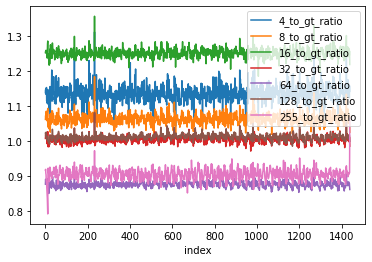

In [110]:
dff.reset_index().plot(x='index', y=["4_to_gt_ratio", "8_to_gt_ratio", "16_to_gt_ratio", "32_to_gt_ratio", "64_to_gt_ratio", "128_to_gt_ratio", "255_to_gt_ratio"])

In [111]:
new_df = pd.DataFrame()

In [112]:
new_df['4_diff'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - (dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))/((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))
new_df['8_diff'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - (dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))/((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))
new_df['16_diff'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - (dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))/((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))
new_df['32_diff'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - (dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))/((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))
new_df['64_diff'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - (dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))/((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))
new_df['128_diff'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - (dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))/((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))
new_df['255_diff'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - (dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))/((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))

In [113]:
new_df['A-1_4'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - 1)
new_df['A-1_8'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - 1)
new_df['A-1_16'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - 1)
new_df['A-1_32'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - 1)
new_df['A-1_64'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - 1)
new_df['A-1_128'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - 1)
new_df['A-1_255'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - 1)

In [114]:
new_df['B-1_4'] = 100 * ((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()) - 1)
new_df['B-1_8'] = 100 * ((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()) - 1)
new_df['B-1_16'] = 100 * ((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()) - 1)
new_df['B-1_32'] = 100 * ((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()) - 1)
new_df['B-1_64'] = 100 * ((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()) - 1)
new_df['B-1_128'] = 100 * ((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()) - 1)
new_df['B-1_255'] = 100 * ((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()) - 1)

In [115]:
new_df

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,0.598989,-0.021015,0.173234,0.260171,0.047853,1.109804,1.391198,3.254855,0.192985,-2.895127,...,-4.003145,-3.446192,-3.586995,2.640052,0.214045,-3.063054,-3.105075,-4.049060,-4.505988,-4.909887
1,1.369875,1.007776,0.505142,1.359275,1.675926,0.771897,1.618063,-3.497739,-3.241786,-6.390295,...,-5.698256,-6.063615,-3.667675,-4.801835,-4.207163,-6.860780,-6.831803,-7.252634,-6.783153,-5.201574
2,0.220298,0.170236,0.398367,0.449091,0.448556,0.498369,0.339907,-6.916774,-6.530396,-5.250566,...,-6.679637,-3.882429,0.608382,-7.121384,-6.689244,-5.626519,-7.835153,-7.096362,-4.359074,0.267566
3,1.652650,1.200630,0.710464,1.071472,0.068748,0.145163,-0.081118,-35.551192,-22.681125,-14.900268,...,-9.534562,-6.427146,-3.748356,-36.598989,-23.598425,-15.500606,-12.851902,-9.596712,-6.562782,-3.670215
4,1.278639,2.184376,0.196764,1.077070,0.931962,1.448676,-2.059617,-2.899408,-2.510984,-5.250566,...,-2.129600,-1.483125,-4.797200,-4.125300,-4.594988,-5.436633,-3.535082,-3.033293,-2.889936,-2.795152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0.368893,0.399701,0.110440,0.397441,-0.228417,-0.657336,0.094849,0.690579,3.262354,2.271642,...,-2.397249,-0.974182,2.625391,0.320503,2.851257,2.158818,-1.886722,-2.173797,-0.318943,2.528144
1435,1.755633,0.855644,0.438325,-0.712858,-0.283198,0.188710,0.625352,-37.944516,-20.050237,-9.885462,...,-7.125719,-3.737017,0.527702,-39.015186,-20.728519,-10.278733,-7.906821,-6.861954,-3.918333,-0.097043
1436,-0.721542,1.094734,-0.465909,0.559463,0.276060,0.533762,0.391955,22.145023,14.955189,5.462882,...,0.368459,-1.337713,-2.780192,23.032756,13.710364,5.956544,3.846706,0.092145,-1.861539,-3.159762
1437,2.336440,0.806648,0.524044,0.648970,-0.837743,-0.256539,0.627195,-32.645012,-21.731082,-13.912503,...,-8.107099,-5.263847,-3.506315,-34.182791,-22.357385,-14.361288,-11.776884,-7.330770,-5.020187,-4.107746


In [116]:
new_df[new_df['4_diff'] < 10]

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,0.598989,-0.021015,0.173234,0.260171,0.047853,1.109804,1.391198,3.254855,0.192985,-2.895127,...,-4.003145,-3.446192,-3.586995,2.640052,0.214045,-3.063054,-3.105075,-4.049060,-4.505988,-4.909887
1,1.369875,1.007776,0.505142,1.359275,1.675926,0.771897,1.618063,-3.497739,-3.241786,-6.390295,...,-5.698256,-6.063615,-3.667675,-4.801835,-4.207163,-6.860780,-6.831803,-7.252634,-6.783153,-5.201574
2,0.220298,0.170236,0.398367,0.449091,0.448556,0.498369,0.339907,-6.916774,-6.530396,-5.250566,...,-6.679637,-3.882429,0.608382,-7.121384,-6.689244,-5.626519,-7.835153,-7.096362,-4.359074,0.267566
3,1.652650,1.200630,0.710464,1.071472,0.068748,0.145163,-0.081118,-35.551192,-22.681125,-14.900268,...,-9.534562,-6.427146,-3.748356,-36.598989,-23.598425,-15.500606,-12.851902,-9.596712,-6.562782,-3.670215
4,1.278639,2.184376,0.196764,1.077070,0.931962,1.448676,-2.059617,-2.899408,-2.510984,-5.250566,...,-2.129600,-1.483125,-4.797200,-4.125300,-4.594988,-5.436633,-3.535082,-3.033293,-2.889936,-2.795152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0.368893,0.399701,0.110440,0.397441,-0.228417,-0.657336,0.094849,0.690579,3.262354,2.271642,...,-2.397249,-0.974182,2.625391,0.320503,2.851257,2.158818,-1.886722,-2.173797,-0.318943,2.528144
1435,1.755633,0.855644,0.438325,-0.712858,-0.283198,0.188710,0.625352,-37.944516,-20.050237,-9.885462,...,-7.125719,-3.737017,0.527702,-39.015186,-20.728519,-10.278733,-7.906821,-6.861954,-3.918333,-0.097043
1436,-0.721542,1.094734,-0.465909,0.559463,0.276060,0.533762,0.391955,22.145023,14.955189,5.462882,...,0.368459,-1.337713,-2.780192,23.032756,13.710364,5.956544,3.846706,0.092145,-1.861539,-3.159762
1437,2.336440,0.806648,0.524044,0.648970,-0.837743,-0.256539,0.627195,-32.645012,-21.731082,-13.912503,...,-8.107099,-5.263847,-3.506315,-34.182791,-22.357385,-14.361288,-11.776884,-7.330770,-5.020187,-4.107746


<AxesSubplot:>

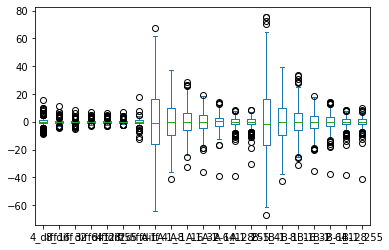

In [117]:
new_df.plot.box()

<AxesSubplot:>

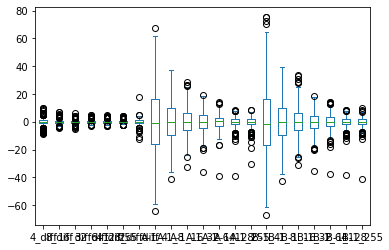

In [118]:
new_df[new_df['4_diff'] < 10].plot.box()

In [119]:
new_df[new_df['4_diff'] > 10].count()

4_diff      1
8_diff      1
16_diff     1
32_diff     1
64_diff     1
128_diff    1
255_diff    1
A-1_4       1
A-1_8       1
A-1_16      1
A-1_32      1
A-1_64      1
A-1_128     1
A-1_255     1
B-1_4       1
B-1_8       1
B-1_16      1
B-1_32      1
B-1_64      1
B-1_128     1
B-1_255     1
dtype: int64

<AxesSubplot:xlabel='index'>

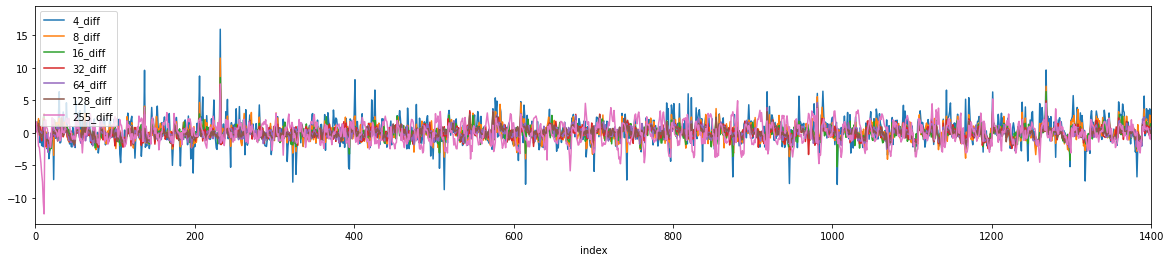

In [120]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

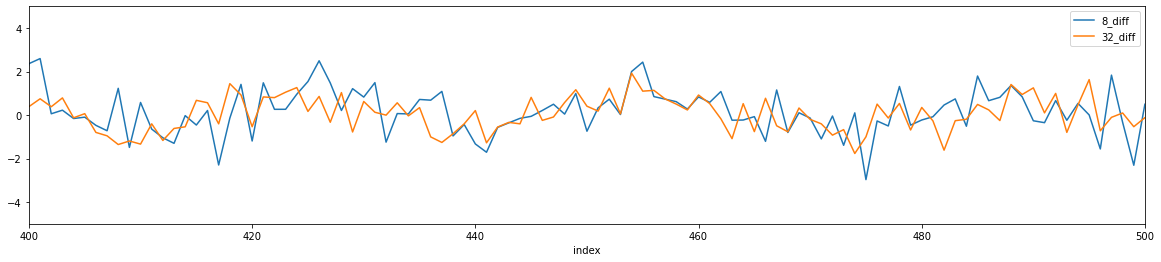

In [121]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[400, 500], x='index',ylim=[-5, 5], y=['8_diff', '32_diff'])

<AxesSubplot:xlabel='index'>

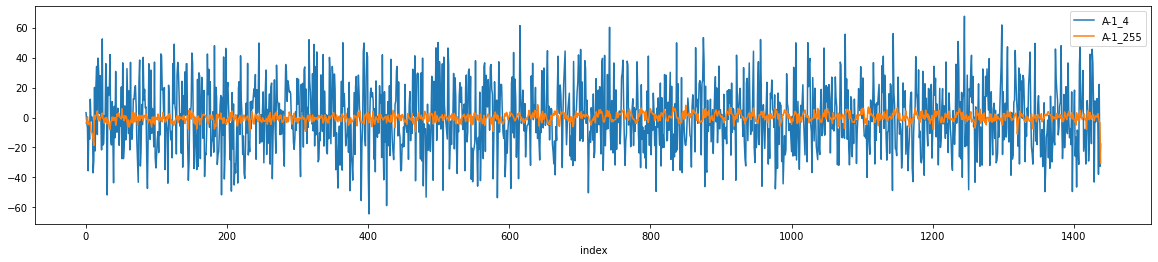

In [122]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_4', 'A-1_255'])

<AxesSubplot:xlabel='index'>

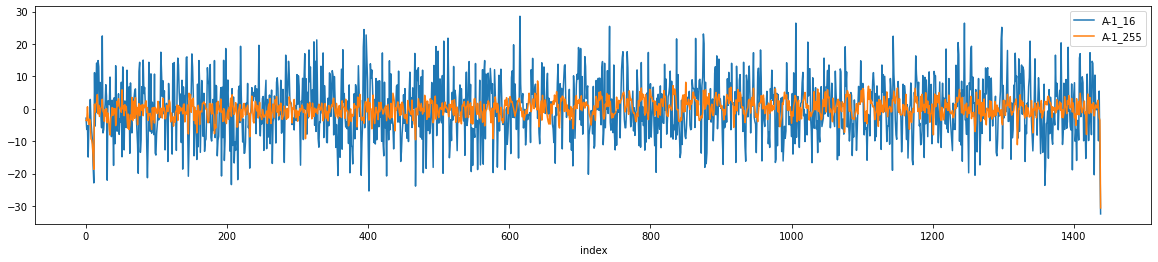

In [123]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_16', 'A-1_255'])

<AxesSubplot:xlabel='index'>

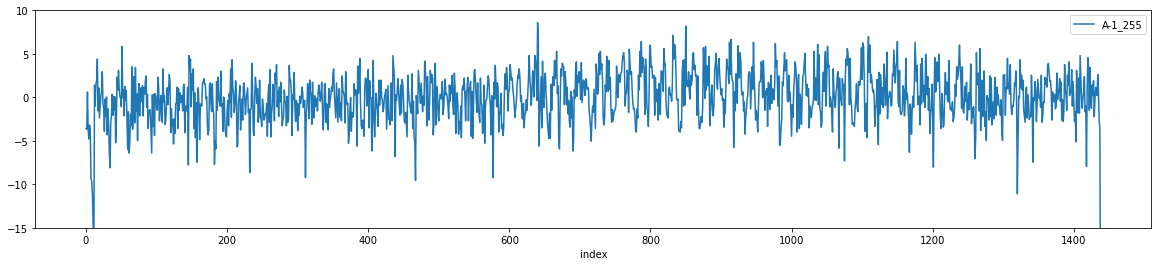

In [124]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_255'], ylim=[-15, 10])

<AxesSubplot:xlabel='index'>

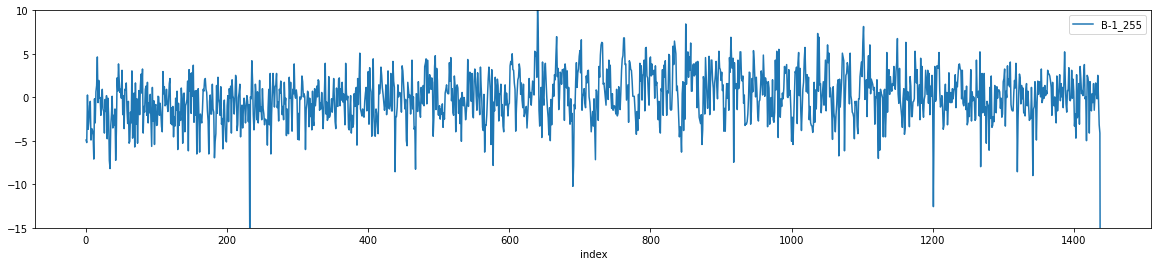

In [125]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['B-1_255'], ylim=[-15, 10])

In [126]:
new_df[new_df['A-1_255'] > 5].count()

4_diff      49
8_diff      49
16_diff     49
32_diff     49
64_diff     49
128_diff    49
255_diff    49
A-1_4       49
A-1_8       49
A-1_16      49
A-1_32      49
A-1_64      49
A-1_128     49
A-1_255     49
B-1_4       49
B-1_8       49
B-1_16      49
B-1_32      49
B-1_64      49
B-1_128     49
B-1_255     49
dtype: int64

In [127]:
new_df[new_df['A-1_255'] < -5].count()

4_diff      48
8_diff      48
16_diff     48
32_diff     48
64_diff     48
128_diff    48
255_diff    48
A-1_4       48
A-1_8       48
A-1_16      48
A-1_32      48
A-1_64      48
A-1_128     48
A-1_255     48
B-1_4       48
B-1_8       48
B-1_16      48
B-1_32      48
B-1_64      48
B-1_128     48
B-1_255     48
dtype: int64

<AxesSubplot:xlabel='index'>

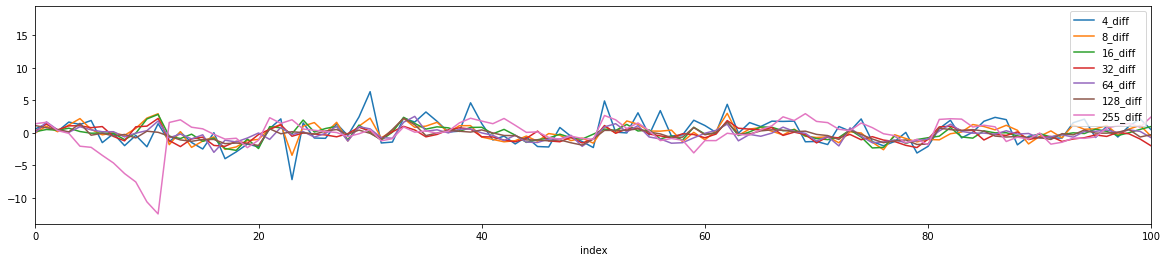

In [128]:
new_df[new_df['4_diff'] < 10].reset_index().plot(figsize=[20, 4],xlim=[0, 100], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

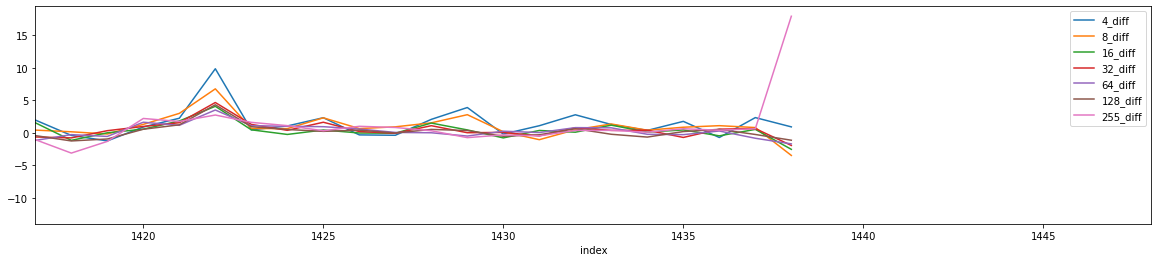

In [129]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[1417, 1448], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [130]:
dff

,4_ground_truth_mapping,8_ground_truth_mapping,16_ground_truth_mapping,32_ground_truth_mapping,64_ground_truth_mapping,128_ground_truth_mapping,255_ground_truth_mapping,4_mapping,8_mapping,16_mapping,...,64_diff_percentage,128_diff_percentage,255_diff_percentage,4_normalized,8_normalized,16_normalized,32_normalized,64_normalized,128_normalized,255_normalized
0,1062,1292,1021,1352,1228,1300,1304,1208,1371,1278,...,-12.415895,1.035839,-9.599988,1204.212851,1372.461748,1276.174749,1357.558974,1075.532805,1313.465902,1178.816157
1,985,1235,981,1300,1187,1269,1300,1129,1324,1232,...,-12.415895,1.035839,-9.599988,1116.901750,1311.911965,1226.177697,1305.345167,1039.623323,1282.144792,1175.200156
2,961,1203,994,1286,1189,1302,1375,1089,1279,1247,...,-12.415895,1.035839,-9.599988,1089.687900,1277.919105,1242.426739,1291.287604,1041.375005,1315.486619,1243.000165
3,656,985,890,1216,1157,1272,1321,754,1058,1120,...,-12.415895,1.035839,-9.599988,743.845226,1046.342742,1112.434404,1220.999787,1013.348091,1285.175868,1194.184159
4,992,1230,996,1346,1241,1322,1333,1136,1334,1247,...,-12.415895,1.035839,-9.599988,1124.839123,1306.600581,1244.926592,1351.534304,1086.918739,1335.693787,1205.032160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1038,1326,1076,1369,1252,1357,1406,1178,1413,1346,...,-12.415895,1.035839,-9.599988,1176.999001,1408.579163,1344.920695,1374.628872,1096.552991,1371.056330,1271.024169
1435,631,1022,945,1285,1192,1308,1370,726,1094,1186,...,-12.415895,1.035839,-9.599988,715.497466,1085.646987,1181.180351,1290.283492,1044.002528,1321.548769,1238.480165
1436,1273,1466,1116,1449,1281,1336,1328,1429,1573,1388,...,-12.415895,1.035839,-9.599988,1443.467947,1557.297928,1394.917747,1454.957805,1121.952381,1349.838804,1200.512160
1437,681,1001,902,1231,1186,1293,1315,788,1071,1133,...,-12.415895,1.035839,-9.599988,772.192986,1063.339172,1127.433520,1236.061462,1038.747481,1306.393394,1188.760158


<AxesSubplot:xlabel='index'>

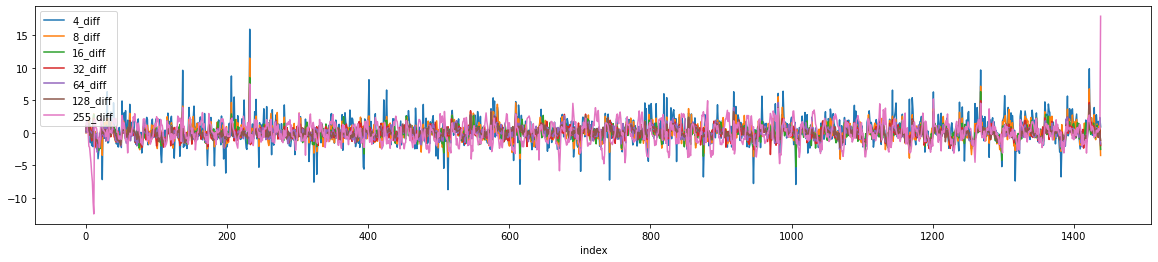

In [131]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])